In [173]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [174]:
accidents = pd.read_csv('Accidents0515.csv',index_col='Accident_Index')
vehicles= pd.read_csv('Vehicles0515.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
casualties = pd.read_csv('Casualties0515.csv', error_bad_lines=False, index_col='Accident_Index', warn_bad_lines=False)

In [175]:
accidents.dropna(inplace=True)
accidents.isnull().values.any()

False

In [176]:
accidents.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,...,0,1,1,2,2,0,0,1,1,E01002849
200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,...,0,5,4,1,1,0,0,1,1,E01002909
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,...,0,0,4,1,1,0,0,1,1,E01002857
200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,...,0,0,1,1,1,0,0,1,1,E01002840
200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,...,0,0,7,1,2,0,0,1,1,E01002863


In [179]:
casualties.isnull().values.any()

False

In [180]:
casualties.head()

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,
200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


In [181]:
vehicles.isnull().values.any()

False

In [182]:
vehicles.head()

,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,1,9,0,18,0,0,0,0,0,0,...,1,15,2,74,10,-1,-1,-1,7,1
200501BS00002,1,11,0,4,0,3,0,0,0,0,...,1,1,1,42,7,8268,2,3,-1,-1
200501BS00003,1,11,0,17,0,0,0,4,0,0,...,1,1,1,35,6,8300,2,5,2,1
200501BS00003,2,9,0,2,0,0,0,0,0,0,...,1,15,1,62,9,1762,1,6,1,1
200501BS00004,1,9,0,18,0,0,0,0,0,0,...,1,15,2,49,8,1769,1,4,2,1


In [183]:
accidents = accidents.join(vehicles, how='outer')
print("Done joining")
print(accidents.shape)

Done joining
(3135569, 52)


In [185]:
#accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR','LSOA_of_Accident_Location',
#               'Junction_Control' ,'2nd_Road_Class'], axis=1, inplace=True)

#combining two columns
accidents['Date_time'] = accidents['Date'] +' '+ accidents['Time']

for col in accidents.columns:
    accidents = (accidents[accidents[col]!=-1])
    #print(col ,' ' , x)
for col in casualties.columns:
    casualties = (casualties[casualties[col]!=-1])

accidents['Date_time'] = pd.to_datetime(accidents.Date_time)
accidents.drop(['Date','Time'],axis =1 , inplace=True)
#accidents.dropna(inplace=True)

In [187]:
accidents.dropna(inplace=True)
accidents.isnull().values.any()

False

Text(0, 0.5, 'Accident count-->')

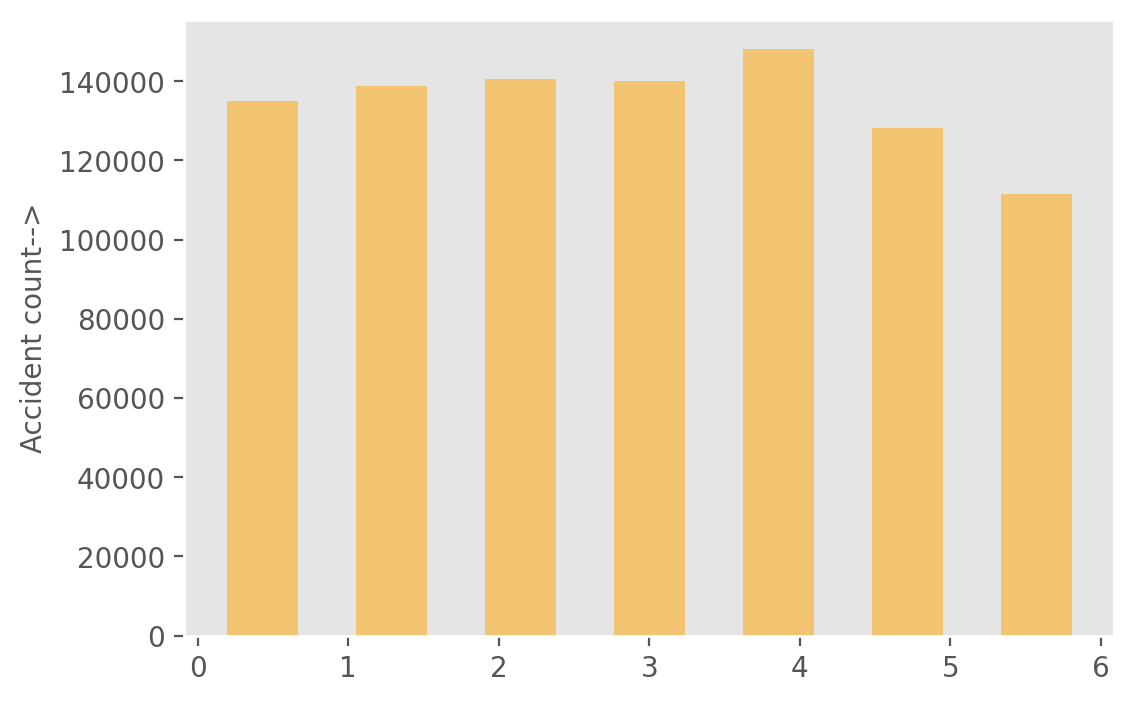

In [188]:
plt.figure(figsize=(6,4))
accidents.Date_time.dt.dayofweek.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'orange')
plt.grid(False)
plt.ylabel('Accident count-->' , fontsize = 10) 

Text(0, 0.5, 'Accident count-->')

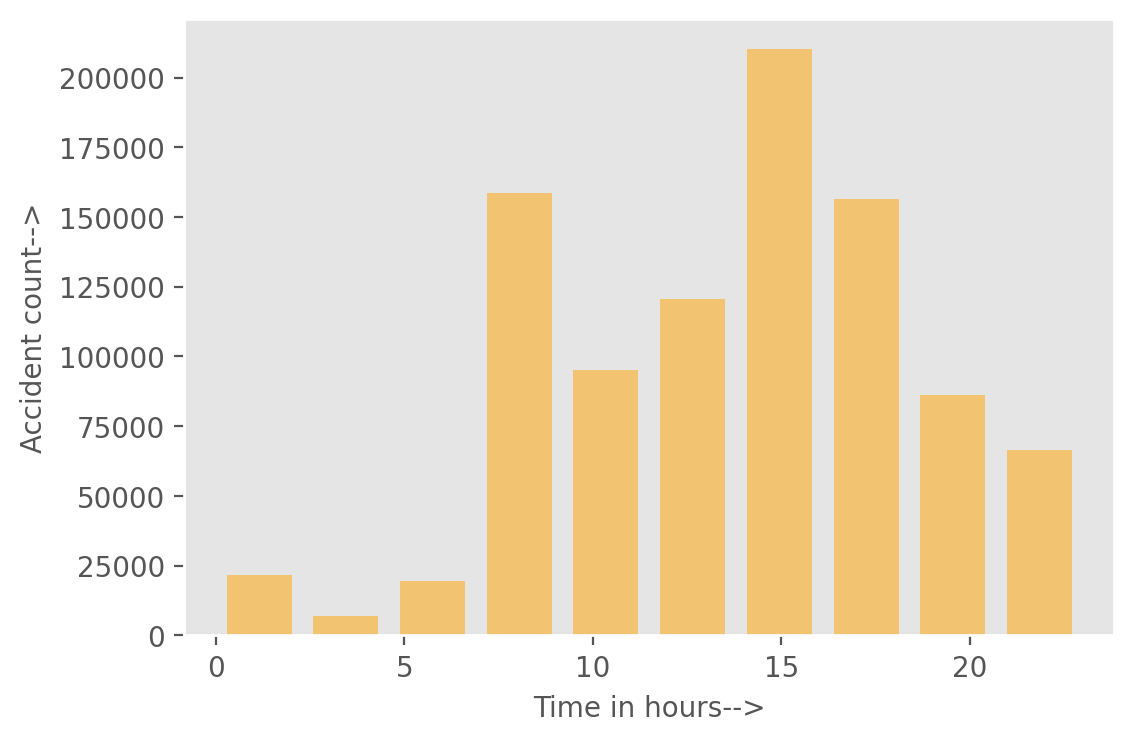

In [189]:
plt.figure(figsize=(6,4))
accidents.Date_time.dt.hour.hist(rwidth=0.75,alpha =0.50, color= 'orange')
plt.grid(False)# sns.distplot(accidents['Age_of_Driver']);
# fig = plt.figure()
# sns.distplot(accidents['Age_of_Vehicle']);
# fig = plt.figure()
# print("done")
plt.xlabel('Time in hours-->' , fontsize = 10)
plt.ylabel('Accident count-->' , fontsize = 10)

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss

In [191]:
#sns.distplot(accidents['Age_of_Driver']);
#sns.distplot(accidents['Age_of_Vehicle']);
accidents['Age_of_Driver'] = np.log(accidents['Age_of_Driver'])
accidents['Age_of_Vehicle'] = np.log(accidents['Age_of_Vehicle'])

In [192]:
accidents.isnull().values.any()

False

In [193]:
accident_ml = accidents.drop('Accident_Severity' ,axis=1)
accident_ml = accident_ml[['Did_Police_Officer_Attend_Scene_of_Accident' , 'Age_of_Driver' ,'Vehicle_Type', 'Age_of_Vehicle','Engine_Capacity_(CC)','Day_of_Week' , 'Weather_Conditions' , 'Road_Surface_Conditions'
                          , 'Light_Conditions', 'Sex_of_Driver' ,'Speed_limit']]

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, 
                                              accidents['Accident_Severity'].values,test_size=0.20, random_state=99)
print("done")

done


In [194]:
accident_ml.head()

,Did_Police_Officer_Attend_Scene_of_Accident,Age_of_Driver,Vehicle_Type,Age_of_Vehicle,Engine_Capacity_(CC),Day_of_Week,Weather_Conditions,Road_Surface_Conditions,Light_Conditions,Sex_of_Driver,Speed_limit
Accident_Index,,,,,,,,,,,
200501BS00007,1.0,3.713572,9.0,1.386294,4266.0,5.0,1.0,1.0,4.0,1.0,30.0
200501BS00010,1.0,3.555348,9.0,2.564949,1998.0,7.0,1.0,1.0,4.0,1.0,30.0
200501BS00011,1.0,3.737670,11.0,0.693147,8268.0,7.0,1.0,1.0,1.0,1.0,30.0
200501BS00012,1.0,3.526361,9.0,1.791759,1988.0,1.0,1.0,1.0,4.0,1.0,30.0
200501BS00014,1.0,2.944439,9.0,2.079442,1124.0,3.0,1.0,2.0,4.0,2.0,30.0


In [195]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 86.83
              precision    recall  f1-score   support

         1.0   0.023438  0.002196  0.004016      1366
         2.0   0.195027  0.041151  0.067962     20777
         3.0   0.884965  0.978776  0.929509    166321

    accuracy                       0.868330    188464
   macro avg   0.367810  0.340708  0.333829    188464
weighted avg   0.802659  0.868330  0.827821    188464



Predicted,1.0,2.0,3.0,All
Actual,,,,
1.0,3,96,1267,1366
2.0,28,855,19894,20777
3.0,97,3433,162791,166321
All,128,4384,183952,188464


In [196]:
lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
     digits=6,
     y_true=y_test, 
     y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 88.25
              precision    recall  f1-score   support

         1.0   0.000000  0.000000  0.000000      1366
         2.0   0.000000  0.000000  0.000000     20777
         3.0   0.882512  0.999988  0.937584    166321

    accuracy                       0.882497    188464
   macro avg   0.294171  0.333329  0.312528    188464
weighted avg   0.778824  0.882497  0.827426    188464



Predicted,1.0,3.0,All
Actual,,,
1.0,0,1366,1366
2.0,1,20776,20777
3.0,2,166319,166321
All,3,188461,188464


In [197]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
     digits=6,
     y_true=y_test, 
     y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 78.04
              precision    recall  f1-score   support

         1.0   0.020607  0.027818  0.023676      1366
         2.0   0.139790  0.168600  0.152849     20777
         3.0   0.888432  0.863006  0.875534    166321

    accuracy                       0.780398    188464
   macro avg   0.349610  0.353141  0.350687    188464
weighted avg   0.799609  0.780398  0.789689    188464



Predicted,1.0,2.0,3.0,All
Actual,,,,
1.0,38,269,1059,1366
2.0,308,3503,16966,20777
3.0,1498,21287,143536,166321
All,1844,25059,161561,188464
